# Implementation of Support Vector Machine

Here we will implement **SVM** algorithm using the dataset *User_Data*.

### Data Pre-processing

In [1]:
# importing libraries

import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
# importing datasets

data_set = pd.read_csv('User_Data.csv')
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# extracting independent and dependent variables

x = data_set.iloc[:, [2,3]].values
y = data_set.iloc[:, 4].values

In [4]:
# splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [5]:
# feature scaling 

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

### Fitting the SVM classifier to the training set:

Now the training set will be fitted to the **SVM classifier**. To create the SVM classifier, we will import **SVC** class from $sklearn.svm$ library. 

In [6]:
from sklearn.svm import SVC   # support vector classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

The model performance can be altered by changing the value of **C(Regularization Factor), gamma,** and **kernel**.

### Predicting the test set result

In [7]:
y_pred = classifier.predict(x_test)

In [8]:
# comparing the values of y_test and y_pred

compare = {'y_test': y_test, 'y_pred': y_pred}
comp_y = pd.DataFrame(compare)

comp_y.head(15)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



### Creating the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[66,  2],
       [ 8, 24]])

As we can see in the above output image, there are **66+24= 90** incorrect predictions and **8+2= 10** correct predictions. Therefore we can say that our SVM model improved as compared to the Logistic regression model.

### Visualising the training set result

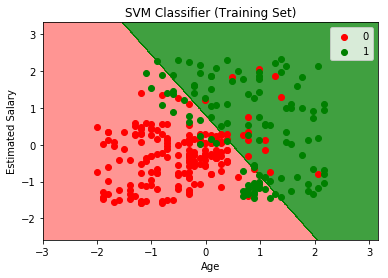

In [10]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max() + 1, step= 0.01),
                    nm.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max() + 1, step= 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha= 0.75, cmap= ListedColormap(('#ff726f','green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label= j)

mtp.title('SVM Classifier (Training Set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

As we can see, the above output is appearing similar to the Logistic regression output. In the output, we got the straight line as hyperplane because we have ***used a linear kernel in the classifier***. And we have also discussed above that for the 2d space, the hyperplane in SVM is a **straight line**.

### Visualizing the test set result

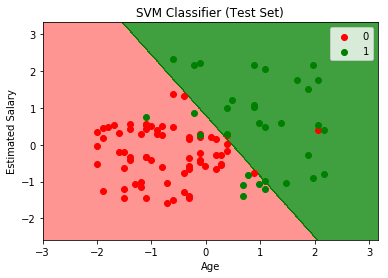

In [11]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start= x_set[:, 0].min() - 1, stop= x_set[:, 0].max() + 1, step= 0.01),
                    nm.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max() + 1, step= 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha= 0.75, cmap= ListedColormap(('#ff726f','green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               c= ListedColormap(('red','green'))(i), label= j)
    
mtp.title('SVM Classifier (Test Set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

As we can see in the above output image, the SVM classifier has divided the users into two regions (Purchased or Not purchased). Users who purchased the SUV are in the red region with the red scatter points. And users who did not purchase the SUV are in the green region with green scatter points. The hyperplane has divided the two classes into Purchased and not purchased variable.

---